In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
data = pd.read_csv('/kaggle/input/knn-dataset/knn-data/5.outlier.csv')
data.columns = ['X0', 'X1', 'Label']
data.head(400)

,X0,X1,Label
0,-26.343161,-3.055257,0
1,-19.059771,-8.531838,0
2,-16.383898,-2.352667,0
3,-12.926541,9.074994,0
4,-22.329233,-13.504121,0
...,...,...,...
395,22.451307,-13.908821,1
396,27.952450,-15.973732,1
397,19.717873,-6.532292,1
398,22.884957,12.073859,1


In [140]:
X = np.array([data['X0'], data['X1']]).T
y = np.array(data['Label'])

In [141]:
def euclidean(d1, d2):
    return np.sqrt(np.sum((d1 - d2)**2))
def predict(X, y, xNew, k):
    ds = []
    for i in range(len(y)):
        d = euclidean(xNew, X[i])
        ds.append((d, y[i]))
    ds.sort(key=lambda x : x[0])
    common = [x[1] for x in ds[:k]]
    Common = Counter(common).most_common(1)
    print(ds[:k])
    return Common[0][0]
    

In [142]:
xNew = np.array([10.3, -20.0])
preLable = predict(X, y, xNew, k)
preLable
X0, X1 = [], []
for i in range(len(y)):
    if y[i] == 1:
        X1.append(X[i])
    else:
        X0.append(X[i])
X0 = np.array(X0)
X1 = np.array(X1)

[(8.142429615442204, 0), (8.145609471801139, 1), (8.716943698109512, 1)]


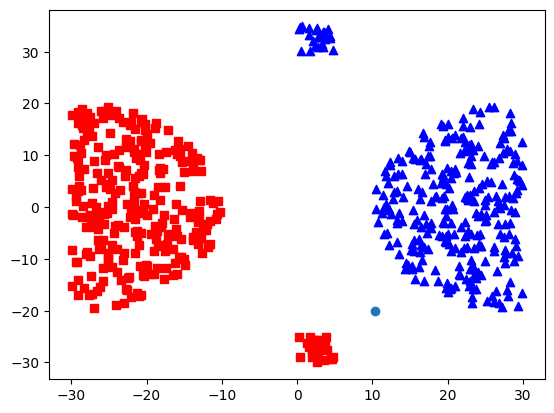

In [143]:
plt.scatter(X0[:, 0], X0[:, 1], c='r', marker='s')
plt.scatter(X1[:, 0], X1[:, 1], c='b', marker='^')
plt.scatter(xNew[0], xNew[1])
plt.show()